In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
features = load_iris()['feature_names']
df = pd.DataFrame(load_iris()['data'], columns=features)
df['target']=load_iris()['target']

In [5]:
print(load_iris()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

![](https://machinelearninghd.com/wp-content/uploads/2021/03/iris-dataset.png)

1. What is the domain set of the Iris dataset? e.g. what is the domain of the feature space?


2. Visualise the dataset and the classes with a pairplot

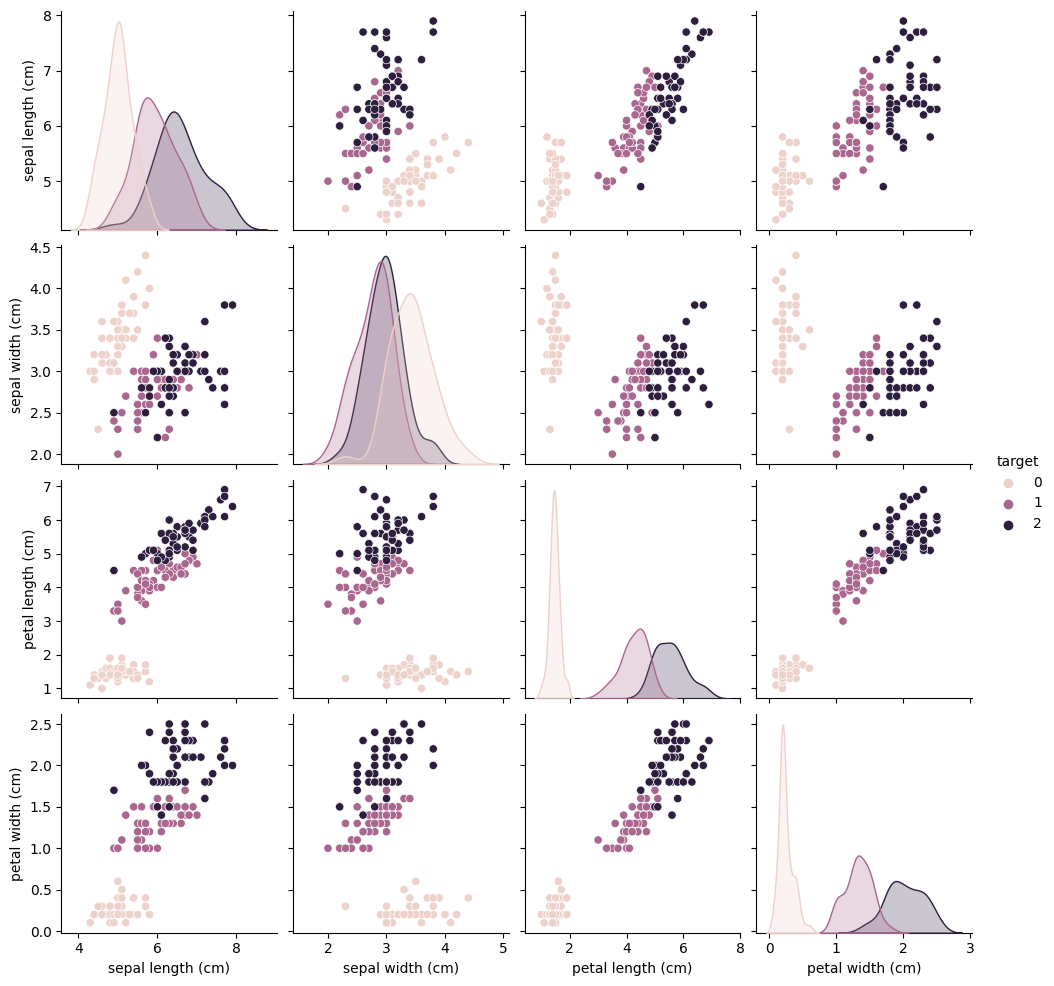

In [6]:
import seaborn as sns
sns.pairplot(df, hue="target")

3. Look at the help of scikit learn sklearn.multiclass.OneVsRestClassifier and use it and the SGDClassifier to construct a multi-class classifier using only the two features "sepal length (cm)" "sepal width (cm)". Plot the separating lines of the classifiers (found in the estimators_ attribute) in the 2D space of the features "sepal length (cm)" "sepal width (cm)".

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

clf_multi = OneVsRestClassifier(SGDClassifier())
id_col = [ "sepal length (cm)", "sepal width (cm)"]
clf_multi.fit(df[id_col], df['target'])

OneVsRestClassifier(estimator=SGDClassifier())

In [11]:
def plot_hyperplane(clf, min_x, max_x):
    # plot the classification line corresponding to the classifier clf
    # min_x, max_x are the minimum and maximum of x axis on which to plot
    w = clf.coef_[0]
    a = -w[0] / w[1]    
    xx = np.linspace(min_x, max_x)
    yy = a * xx - (clf.intercept_[0])/w[1]
    plt.plot(xx, yy)

(0.0, 5.0)

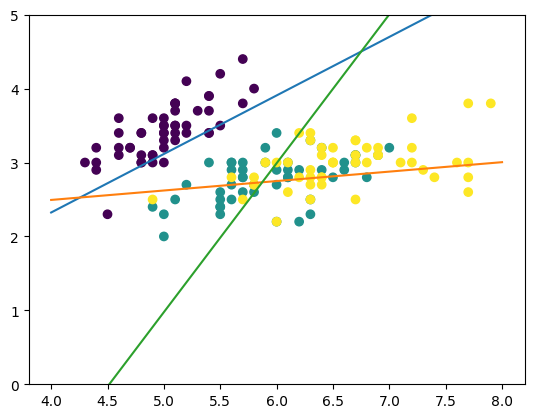

In [12]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'])
for clf in clf_multi.estimators_:
    plot_hyperplane(clf, 4, 8)
plt.ylim(0,5)

4. Fit the classifier on the entire dataset, compute the training and test error. Which scoring do you use and why?

In [20]:
from sklearn.model_selection import cross_val_score
clf_multi = OneVsRestClassifier(SGDClassifier())
clf_multi.fit(df[features], df['target'])
np.mean(cross_val_score(clf_multi, df[features], df['target'], cv = 10, scoring="accuracy"))

0.78

5. Look at the help of sklearn.multiclass.OneVsOneClassifier and use it to constuct another multi-class classifier. Which multi-class scheme is the best for the dataset at hand? What is the down-side of OneVsOneClassifier?

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsOneClassifier
clf_multi = OneVsOneClassifier(SGDClassifier())
clf_multi.fit(df[features], df['target'])
np.mean(cross_val_score(clf_multi, df[features], df['target'], cv = 10, scoring="accuracy"))

0.9

6. Compute the confusion matrix for the classification task on both training and test. Is there a class that is particularly easy/hard to classify?

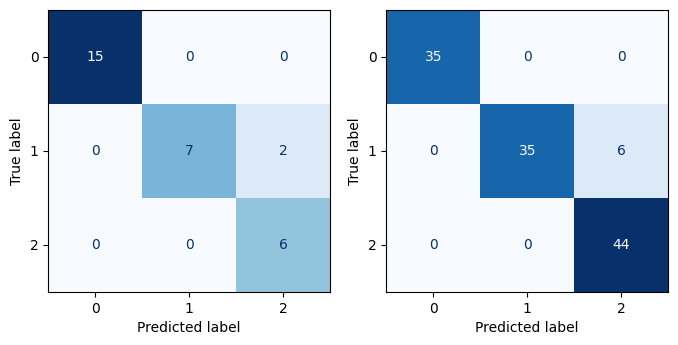

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df['target'], test_size=0.2)
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes = axes.ravel()
clf = OneVsOneClassifier(SGDClassifier())
clf.fit(X_train, y_train)
prediction_test = clf.predict(X_test)
prediction_train = clf.predict(X_train)

C = confusion_matrix(y_test, prediction_test)
disp = ConfusionMatrixDisplay(confusion_matrix=C)
disp.plot(ax = axes[0], cmap=plt.cm.Blues,colorbar=False)

C = confusion_matrix(y_train, prediction_train)
disp = ConfusionMatrixDisplay(confusion_matrix=C)
disp.plot(ax = axes[1], cmap=plt.cm.Blues,colorbar=False)

7. Look up the help of sklearn.model_selection.GridSearchCV what does it do? Use it to find the best loss and the best degree of polynomial for this task.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PolynomialFeatures(), StandardScaler(), 
                    OneVsOneClassifier(SGDClassifier(average=True)))

parameters = { "polynomialfeatures__degree":[1,2,3, 4, 5],
               "onevsoneclassifier__estimator__loss":["hinge", "log_loss", "modified_huber"]}

In [26]:
grid = GridSearchCV(clf, parameters, cv = 10)
grid.fit(df[features], df['target'])

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('onevsoneclassifier',
                                        OneVsOneClassifier(estimator=SGDClassifier(average=True)))]),
             param_grid={'onevsoneclassifier__estimator__loss': ['hinge',
                                                                 'log_loss',
                                                                 'modified_huber'],
                         'polynomialfeatures__degree': [1, 2, 3, 4, 5]})

In [27]:
print(grid.best_score_,grid.best_params_)

0.9800000000000001 {'onevsoneclassifier__estimator__loss': 'log_loss', 'polynomialfeatures__degree': 4}


In [28]:
?SGDClassifier

Init signature:
SGDClassifier(
    loss='hinge',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    n_jobs=None,
    random_state=None,
    learning_rate='optimal',
    eta0=0.0,
    power_t=0.5,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,
    average=False,
)
Docstring:     
Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic
gradient descent (SGD) learning: the gradient of the loss is estimated
each sample at a time and the model is updated along the way with a
decreasing strength schedule (aka learning rate). SGD allows minibatch
(online/out-of-core) learning via the `partial_fit` method.
For best results using the default learning rate schedule, the data should
have zero mean and unit variance.

